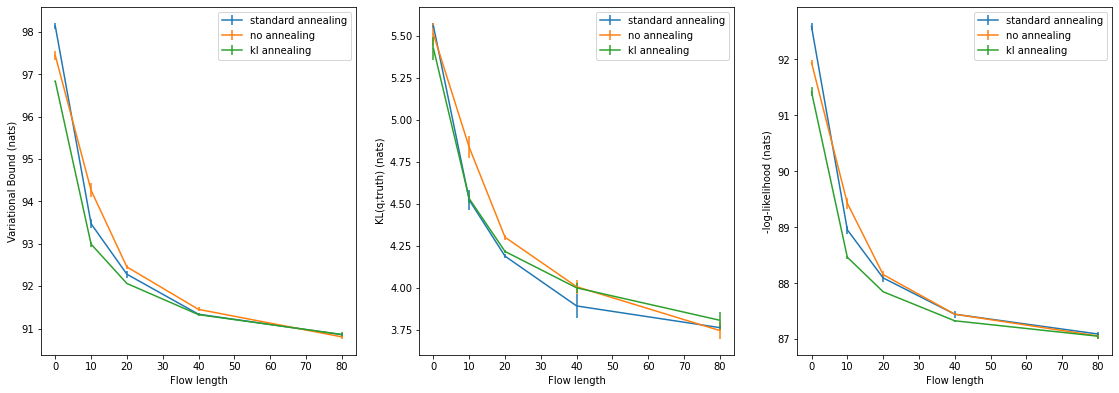

                      Model   -ln p(x)
0  DLGM diagonal covariance  92.584217
1            DLGM+NF (k=10)  88.953162
2            DLGM+NF (k=20)  88.094351
3            DLGM+NF (k=40)  87.446337
4            DLGM+NF (k=80)  87.092642


In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

flows = [0, 10, 20, 40, 80]
anneals = ["std", "without", "kl"]

path = "logs/planarflow_k_"

ELBO_stdanneal = []
ELBO_withoutanneal = []
ELBO_klanneal = []

log_likelihood_stdanneal = []
log_likelihood_withoutanneal = []
log_likelihood_klanneal = []

KL_stdanneal = []
KL_withoutanneal = []
KL_klanneal = []

ELBO_stdanneal_mean = []
ELBO_withoutanneal_mean  = []
ELBO_klanneal_mean = []
ELBO_stdanneal_stdev = []
ELBO_withoutanneal_stdev  = []
ELBO_klanneal_stdev = []

log_likelihood_stdanneal_mean = []
log_likelihood_withoutanneal_mean = []
log_likelihood_klanneal_mean = []
log_likelihood_stdanneal_stdev = []
log_likelihood_withoutanneal_stdev = []
log_likelihood_klanneal_stdev = []

KL_stdanneal_mean = []
KL_withoutanneal_mean  = []
KL_klanneal_mean = []
KL_stdanneal_stdev = []
KL_withoutanneal_stdev  = []
KL_klanneal_stdev = []

def extract(metric, stdlist, withoutlist, kllist):
    for flow in flows:
        kpath = path + str(flow)
        for anneal in anneals:
            rpath = "results_" + anneal + "annealing.json"
            filepath = os.path.join(kpath, rpath)
            metriclist = []
            with open(filepath) as file:
                data = json.load(file)
                metriclist.append(data[metric])
            rpath2 = "results_" + anneal + "annealing_2.json"
            filepath2 = os.path.join(kpath, rpath2)
            try:
                with open(filepath2) as file:
                    data = json.load(file)
                    metriclist.append(data[metric])
            except:
                pass
            rpath3 = "results_" + anneal + "annealing_3.json"
            filepath3 = os.path.join(kpath, rpath3)
            try:
                with open(filepath3) as file:
                    data = json.load(file)
                    metriclist.append(data[metric])
            except:
                pass
            if anneal == "std":
                list = stdlist
            elif anneal == "without":
                list = withoutlist
            elif anneal == "kl":
                list = kllist
            list.append(metriclist)
    
    return stdlist, withoutlist, kllist

def calculatekl(KL_list, ELBO_list, LL_list):
    for i in range(5):
        zip_object = zip(ELBO_list[i], LL_list[i])
        KL = []
        for ELBO_i, LL_i in zip_object:
            KL.append(ELBO_i - LL_i)
        KL_list.append(KL)
    
    return KL_list


def calculatemeanstd(list, mean_list, stdev_list):
    for item in list:
        mean = sum(item) / len(item)
        if len(item) == 1:
            stdev = 0.05
        else:
            stdev = np.std(item)
        mean_list.append(mean)
        stdev_list.append(stdev)
    
    return mean_list, stdev_list

def plot(metric, stdanneal_mean, stdanneal_stdev, withoutanneal_mean, withoutanneal_stdev, klanneal_mean, klanneal_stdev):
    plt.errorbar(flows, stdanneal_mean, yerr=stdanneal_stdev, label = "standard annealing")
    plt.errorbar(flows, withoutanneal_mean, yerr=withoutanneal_stdev, label = "no annealing")
    plt.errorbar(flows, klanneal_mean, yerr=klanneal_stdev, label = "kl annealing")
    plt.xlabel("Flow length")
    plt.ylabel(metric)
    plt.legend()

ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal = extract("ELBO", ELBO_stdanneal, ELBO_withoutanneal, ELBO_klanneal)
log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal = extract("Log_likelihood", log_likelihood_stdanneal, log_likelihood_withoutanneal, log_likelihood_klanneal)

KL_stdanneal = calculatekl(KL_stdanneal, ELBO_stdanneal, log_likelihood_stdanneal)
KL_withoutanneal = calculatekl(KL_withoutanneal, ELBO_withoutanneal, log_likelihood_withoutanneal)
KL_klanneal = calculatekl(KL_klanneal, ELBO_klanneal, log_likelihood_klanneal)

ELBO_stdanneal_mean, ELBO_stdanneal_stdev = calculatemeanstd(ELBO_stdanneal, ELBO_stdanneal_mean, ELBO_stdanneal_stdev)
ELBO_withoutanneal_mean, ELBO_withoutanneal_stdev = calculatemeanstd(ELBO_withoutanneal, ELBO_withoutanneal_mean, ELBO_withoutanneal_stdev)
ELBO_klanneal_mean, ELBO_klanneal_stdev = calculatemeanstd(ELBO_klanneal, ELBO_klanneal_mean, ELBO_klanneal_stdev)

log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev = calculatemeanstd(log_likelihood_stdanneal, log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev)
log_likelihood_withoutanneal_mean, log_likelihood_withoutanneal_stdev = calculatemeanstd(log_likelihood_withoutanneal, log_likelihood_withoutanneal_mean, log_likelihood_withoutanneal_stdev)
log_likelihood_klanneal_mean, log_likelihood_klanneal_stdev = calculatemeanstd(log_likelihood_klanneal, log_likelihood_klanneal_mean, log_likelihood_klanneal_stdev)

KL_stdanneal_mean, KL_stdanneal_stdev = calculatemeanstd(KL_stdanneal, KL_stdanneal_mean, KL_stdanneal_stdev)
KL_withoutanneal_mean, KL_withoutanneal_stdev = calculatemeanstd(KL_withoutanneal, KL_withoutanneal_mean, KL_withoutanneal_stdev)
KL_klanneal_mean, KL_klanneal_stdev = calculatemeanstd(KL_klanneal, KL_klanneal_mean, KL_klanneal_stdev)

plt.figure(figsize=(19.2,6.4))
plt.subplot(1,3,1)
plot("Variational Bound (nats)", ELBO_stdanneal_mean, ELBO_stdanneal_stdev, ELBO_withoutanneal_mean, ELBO_withoutanneal_stdev, ELBO_klanneal_mean, ELBO_klanneal_stdev)
plt.subplot(1,3,2)
plot("KL(q;truth) (nats)", KL_stdanneal_mean, KL_stdanneal_stdev, KL_withoutanneal_mean, KL_withoutanneal_stdev, KL_klanneal_mean, KL_klanneal_stdev)
plt.subplot(1,3,3)
plot("-log-likelihood (nats)", log_likelihood_stdanneal_mean, log_likelihood_stdanneal_stdev, log_likelihood_withoutanneal_mean, log_likelihood_withoutanneal_stdev, log_likelihood_klanneal_mean, log_likelihood_klanneal_stdev)
plt.show()

d = {"Model": ["DLGM diagonal covariance", "DLGM+NF (k=10)", "DLGM+NF (k=20)", "DLGM+NF (k=40)", "DLGM+NF (k=80)"], "-ln p(x)": log_likelihood_stdanneal_mean}
df = pd.DataFrame(data=d)
print(df)